In [1]:
print('hi')

hi


In [78]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
import numpy as np

## 1. Dataset

### 1-1. Download

Link: https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST

In [79]:
from torch.utils.data import Subset
transform=torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.1307,), (0.3081,))
        ])
train_size = 10000
test_size = 1000

train_dataset = torchvision.datasets.MNIST('./', train=True, download=True, transform=transform)
train_dataset = Subset(train_dataset, np.arange(train_size))
test_dataset = torchvision.datasets.MNIST('./', train=False, download=True, transform=transform)
test_dataset = Subset(test_dataset, np.arange(test_size))

In [82]:
train_dataset

In [83]:
test_dataset

### 1-2. Display Sample Data

Dataset 클래스는 인덱싱이 가능하다.

인덱싱을 통해 하나의 data를 확인해보면, (이미지, 라벨)의 튜플이다.

이미지 크기는 (28, 28) 이다

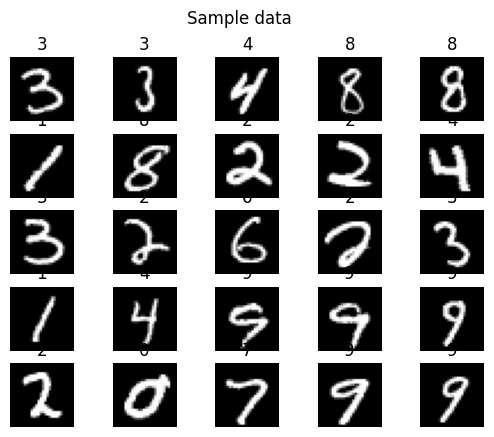

In [84]:
row = 5
col = 5
plt.figure()
for i in range(1, row*col + 1) :
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    img = img.numpy().reshape(28, 28, -1)
    plt.subplot(row, col, i)
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title(label)
plt.suptitle('Sample data')
plt.show()

In [85]:
img, label = train_dataset[sample_idx]
print(img.shape)

torch.Size([1, 28, 28])


### 1-3. DataLoader

Link: https://tutorials.pytorch.kr/beginner/basics/data_tutorial.html#dataloader

DataLoader는 데이터셋을 iterable로 만들어준다.

In [86]:
batch_size = 64

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [15]:
train_loader

In [16]:
test_loader

## 2. Model Definition

Pytorch의 nn.Module은 모든 neural network의 base class이다.

링크: https://pytorch.org/docs/stable/generated/torch.nn.Module.html

init 함수에서 super()를 호출하여 base class의 변수들을 상속받는다.

In [71]:
class NeuralNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(6272, 128)
        self.fc2 = nn.Linear(128, 10)
    def forward(self, x):
        # (1, 28, 28) -> (16, 28, 28)
        x = self.conv1(x)
        x = F.relu(x)
        
        # (16, 28, 28) -> (32, 28, 28)
        x = self.conv2(x)
        x = F.relu(x)
        
        # (32, 28, 28) -> (32, 14, 14)
        x = F.max_pool2d(x, 2)

        # (32, 14, 14) -> (6272, 1)
        x = torch.flatten(x, 1)

        # (6272, 1) -> (128, 1)
        x = self.fc1(x)
        x = F.relu(x)
        
        # (128, 1) -> (10, 1)
        x = self.fc2(x)
        
        output = F.log_softmax(x, dim=1)
        return output

In [74]:
def train(model, train_loader, optimizer, epoch, log_interval):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        
        if batch_idx % log_interval == 0 :
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

In [91]:
myNeuralNet = NeuralNet()
myOptimizer = torch.optim.Adam(myNeuralNet.parameters())

epochs = 5
for epoch in range(epochs):
    train(myNeuralNet, train_loader, myOptimizer, epoch, log_interval=10)

Train Epoch: 0 [0/10000 (0%)]	Loss: 2.325434
Train Epoch: 0 [640/10000 (6%)]	Loss: 1.352224
Train Epoch: 0 [1280/10000 (13%)]	Loss: 0.661643
Train Epoch: 0 [1920/10000 (19%)]	Loss: 0.474627
Train Epoch: 0 [2560/10000 (25%)]	Loss: 0.370973
Train Epoch: 0 [3200/10000 (32%)]	Loss: 0.471857
Train Epoch: 0 [3840/10000 (38%)]	Loss: 0.213268
Train Epoch: 0 [4480/10000 (45%)]	Loss: 0.396918
Train Epoch: 0 [5120/10000 (51%)]	Loss: 0.171763
Train Epoch: 0 [5760/10000 (57%)]	Loss: 0.182309
Train Epoch: 0 [6400/10000 (64%)]	Loss: 0.226791
Train Epoch: 0 [7040/10000 (70%)]	Loss: 0.253377
Train Epoch: 0 [7680/10000 (76%)]	Loss: 0.162337
Train Epoch: 0 [8320/10000 (83%)]	Loss: 0.166479
Train Epoch: 0 [8960/10000 (89%)]	Loss: 0.246348
Train Epoch: 0 [9600/10000 (96%)]	Loss: 0.257746
Train Epoch: 1 [0/10000 (0%)]	Loss: 0.175228
Train Epoch: 1 [640/10000 (6%)]	Loss: 0.148603
Train Epoch: 1 [1280/10000 (13%)]	Loss: 0.052552
Train Epoch: 1 [1920/10000 (19%)]	Loss: 0.067527
Train Epoch: 1 [2560/10000 (25%)